# Smoke detection project

## Import data

In [37]:
# Import libraries
import pandas as pd
import seaborn as sns

df = pandas.read_csv('smoke_detection_iot.csv', index_col=0)

# Check number of rows and columns and compare to dataset from terminal
print(df.shape)

(62630, 15)


In [38]:
# Check col names
print(df.columns)

# Rename columns
df.rename(columns = {'Temperature[C]': 'temperature_C',
                     'Humidity[%]': 'humidity', 
                     'TVOC[ppb]': 'TVOC_ppb',
                     'eCO2[ppm]': 'CO2_ppm', 
                     'Raw H2': 'raw_H2', 
                     'Raw Ethanol': 'raw_ethanol', 
                     'Pressure[hPa]': 'pressure_hPA', 
                     'Fire Alarm': 'fire'},
          inplace = True)

print(df.columns)

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')
Index(['UTC', 'temperature_C', 'humidity', 'TVOC_ppb', 'CO2_ppm', 'raw_H2',
       'raw_ethanol', 'pressure_hPA', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'CNT', 'fire'],
      dtype='object')


In [39]:
df.dtypes

UTC                int64
temperature_C    float64
humidity         float64
TVOC_ppb           int64
CO2_ppm            int64
raw_H2             int64
raw_ethanol        int64
pressure_hPA     float64
PM1.0            float64
PM2.5            float64
NC0.5            float64
NC1.0            float64
NC2.5            float64
CNT                int64
fire               int64
dtype: object

In [40]:
print(df.describe())

                UTC  temperature_C      humidity      TVOC_ppb       CO2_ppm  \
count  6.263000e+04   62630.000000  62630.000000  62630.000000  62630.000000   
mean   1.654792e+09      15.970424     48.539499   1942.057528    670.021044   
std    1.100025e+05      14.359576      8.865367   7811.589055   1905.885439   
min    1.654712e+09     -22.010000     10.740000      0.000000    400.000000   
25%    1.654743e+09      10.994250     47.530000    130.000000    400.000000   
50%    1.654762e+09      20.130000     50.150000    981.000000    400.000000   
75%    1.654778e+09      25.409500     53.240000   1189.000000    438.000000   
max    1.655130e+09      59.930000     75.200000  60000.000000  60000.000000   

             raw_H2   raw_ethanol  pressure_hPA         PM1.0         PM2.5  \
count  62630.000000  62630.000000  62630.000000  62630.000000  62630.000000   
mean   12942.453936  19754.257912    938.627649    100.594309    184.467770   
std      272.464305    609.513156      1.3

In [41]:
df.head()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [42]:
df.tail()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [43]:
# Null x non-null
df.isnull().sum()
# There is no missing data

UTC              0
temperature_C    0
humidity         0
TVOC_ppb         0
CO2_ppm          0
raw_H2           0
raw_ethanol      0
pressure_hPA     0
PM1.0            0
PM2.5            0
NC0.5            0
NC1.0            0
NC2.5            0
CNT              0
fire             0
dtype: int64

In [44]:
# Correlations between variables
df.corr()

,UTC,temperature_C,humidity,TVOC_ppb,CO2_ppm,raw_H2,raw_ethanol,pressure_hPA,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire
UTC,1.000000,-0.164174,-0.391907,0.180731,0.132100,-0.151088,0.166555,-0.434375,0.123168,0.105304,0.130288,0.103695,0.083234,-0.251595,-0.389404
temperature_C,-0.164174,1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.089850,-0.163902
humidity,-0.391907,-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.251965,0.399846
TVOC_ppb,0.180731,0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.057703,-0.214743
CO2_ppm,0.132100,0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.106681,-0.097006
raw_H2,-0.151088,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,-0.031036,0.107007
raw_ethanol,0.166555,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.511995,-0.340652
pressure_hPA,-0.434375,-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.186290,0.249797
PM1.0,0.123168,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.093700,-0.110552
PM2.5,0.105304,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.083869,-0.084916


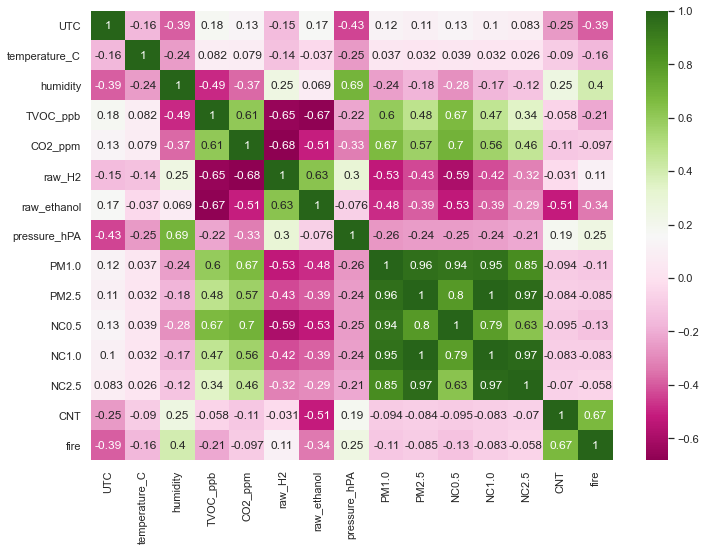

In [51]:
# Visualizations

# Correlation heatmap
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(df.corr(), annot = True, cmap="PiYG")